# Research Question 1
## How does the age of the house correlate with renovation, condition and grade?
To answer this question, I first took a closer look at yr, built, yr_renovated, condition, grade.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading cleaned data into Panda DataFrame
df = pd.read_csv("data/King_County_House_prices_dataset_cleaned.csv")

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

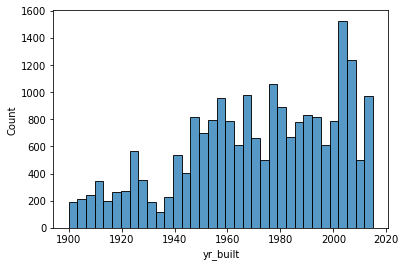

In [3]:
#  Histogram of construction years
sns.histplot(data=df, x="yr_built")

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

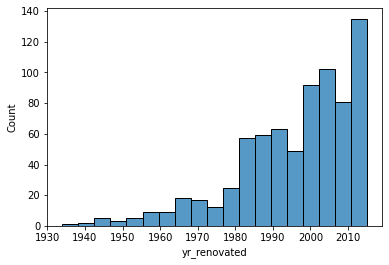

In [4]:
# Histogram of the renovation years
sns.histplot(data=df, x="yr_renovated")

Most houses were renovated in the last 40 years.

<AxesSubplot:xlabel='grade', ylabel='Count'>

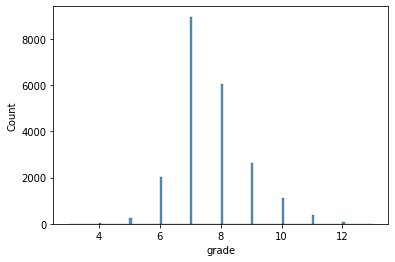

In [5]:
# Histogram of the grade
sns.histplot(data=df, x="grade")

Grade 7 and 8 are the most common. Grade 6 is the lowest grade currently meeting building code. Due to the unlimited budget of my stakeholder I wanted to find a house with grade 9 or higher,  
which means above average design and quality. Explanations of the grades and also condition can be found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r).

<AxesSubplot:xlabel='condition', ylabel='Count'>

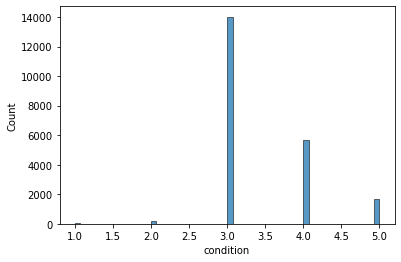

In [6]:
# Histogram of the condition
sns.histplot(data=df, x="condition")

Most houses are of condition 3 or higher. A condition of 3 was the minimum I wanted for a suitable house.

#### Correlation of  age, renovation, condition, and grade
Next, I took a look at the correlation of the data relevant for research question 1.

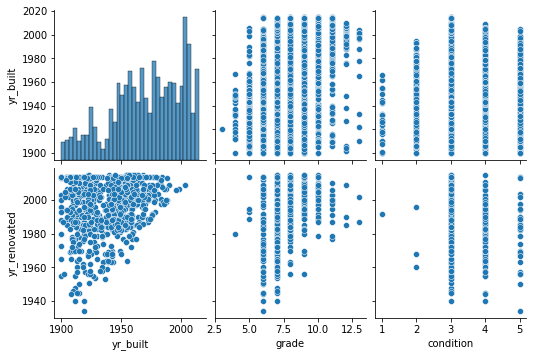

In [7]:
# Creating correlation plots
sns.pairplot(
    df,
    x_vars=["yr_built","grade", "condition"],
    y_vars=["yr_built","yr_renovated"],
)

Observations:
- The older the house, the more likely it was renovated
- Highest grade houses tend to be either new or very old
- Low grade houses with bad condition were mostly built before 1960
- Renovated houses are in better condition
- High grades only for houses renovated in the last 40 years

The relationship between these data could be shown in a correlation matrix:

<AxesSubplot:>

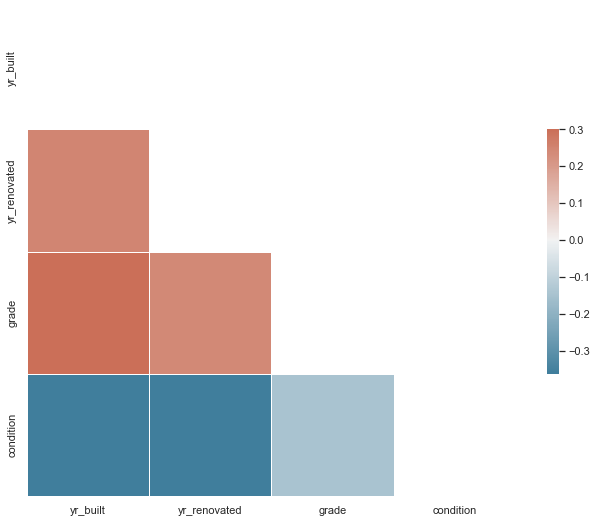

In [8]:
# Creating a new DataFrame with relevant data
df_q1 = df.filter(['yr_built','yr_renovated','grade','condition'])

# Plotting a correlation matrix 
sns.set_theme(style="white")

# Compute the correlation matrix
corr_q1 = df_q1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_q1, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_q1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The observations were mostly confirmed by a look at this matrix, however there was a negative correlation of condition with everything else. My stakeholder wants an old house, so my guess was that it should be renovated. But I wanted to be sure, so I created two new DataFrames and looked at descriptive statistics:

In [9]:
# Creating a new DataFrame with old houses that were renovated
df_q1_1 = df_q1.query('yr_built < 1972 and yr_renovated == yr_renovated')

# Creating a new DataFrame with old houses that where not renovated
df_q1_2 = df_q1.query('yr_built < 1972 and yr_renovated != yr_renovated')

In [10]:
# Descriptive statistics of renovated old houses
df_q1_1.describe()

,yr_built,yr_renovated,grade,condition
count,688.000000,688.000000,688.00000,688.000000
mean,1936.181686,1995.302326,7.68314,3.225291
std,19.526278,15.931217,1.15780,0.528765
min,1900.000000,1934.000000,4.00000,1.000000
25%,1919.000000,1986.000000,7.00000,3.000000
50%,1939.000000,1999.000000,8.00000,3.000000
75%,1952.000000,2007.000000,8.00000,3.000000
max,1971.000000,2015.000000,13.00000,5.000000


In [11]:
# Descriptive statistics of non-renovated old houses
df_q1_2.describe()

,yr_built,yr_renovated,grade,condition
count,9591.000000,0.0,9591.000000,9591.000000
mean,1945.838077,NaN,7.060890,3.665311
std,19.111433,NaN,0.900842,0.750505
min,1900.000000,NaN,3.000000,1.000000
25%,1930.000000,NaN,7.000000,3.000000
50%,1951.000000,NaN,7.000000,4.000000
75%,1961.000000,NaN,7.000000,4.000000
max,1971.000000,NaN,13.000000,5.000000


Interestingly, non-renovated old houses seem to have lower grade, but higher condition. 

#### Conclusion

The research question and hypothesis were:

How does the age of the house correlate with renovation, condition and grade?
- If a house is historic (> 50 years old), it either has low condition/grade, or was renovated and has a good condition/grade

Hypothesis 1 seems to false. Renovated historic houses on average have actually significantly worse condition compared to non-renovated houses. However, the average grade is significantly higher for renovated historic houses.

__Takeaway: For my stakeholder, it doesn't matter if a historic house is renovated or not.__